## 43. Метод Монте–Карло. Объем $n$-мерного шара

В пространстве ${\bf R}^n$ *$n$-мерным (гипер)шаром* *радиуса $r$* называется множество точек , удаленных от заданной точки (*центра шара*) $c=(c_1,c_2,\dots,c_n)$ на расстояние, не превышающее $r$, т.е. это множество точек, координаты которых удовлетворяют неравенству
$$
(x_1-c_1)^2 + (x_2-c_2)^2 + \dots + (x_n-c_n)^2 \le r^2.
$$
Объем $V_{n}$ $n$-мерного шара равен
$$
V_{n}={\frac {\pi ^{n/2}}{\displaystyle \Gamma \left({\frac{n}{2}}+1\right)}}\cdot r^n,
$$
где $\Gamma(x)$ – гамма-функция. 
В частности,
$$
V_2 = \pi r^2, \qquad  
V_3 = \frac{4}{3}\pi r^3, \qquad
V_4 = \frac{1}{2}\pi^2 r^4, \qquad
V_5 = \frac{8}{15}\pi^2 r^5, \qquad
V_6 = \frac{1}{6}\pi^3 r^6.
$$
$$
\Gamma(x) = (x-1)!
$$
Если $r=1$, то шар называется *единичным*.

Функцию $\Gamma(x)$ можно вычислить с помощью или 
Постройте графики $\Gamma(x)$ для $-5\le x \le 4$ и для  $0e< x \le 10$. Во втором случае воспользуйтесь логарифмической шкалой.

Для $n=3,4,5,6$ оцените величины объемов единичных шаров методом Монте–Карло. 
Вы сэкономите много (сколько?) испытаний, если будете генерировать точки только с неотрицательными координатами $0\le x_j \le 1$ $(j=1,2,\dots,n)$.
Каждый раз сделайте $N = 1, 10, 100, 1000, \dots, 100000000$ испытаний. Аналогичный эксперимент проведите, генерируя точки по равномерной сетке. Сравните результаты с теоретическими.

Для вычисления $\Gamma(x)$ воспользуйтесь `math.gamma(x)` или `scipy.special.gamma(x)`.

Сделайте выводы.




---

Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import itertools

График гамма-функции для $-5\le x \le 4$

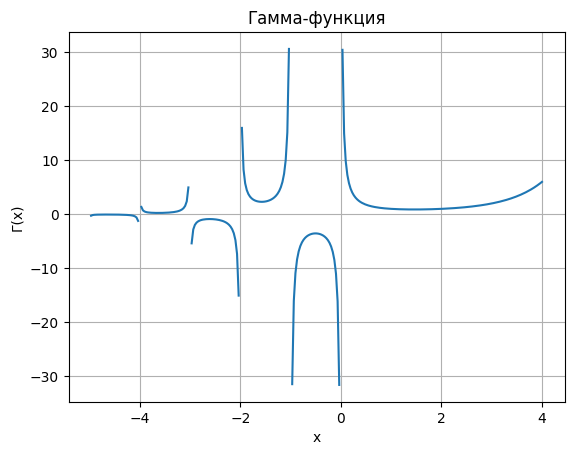

In [ ]:
x = np.linspace(-5, 4, 280)
y = [scipy.special.gamma(i) for i in x]

plt.plot(x, y)
plt.title("Гамма-функция")
plt.xlabel("x")
plt.ylabel("Г(x)")
plt.grid(True)
plt.show()

График гамма-функции для $0 < x \le 10$ с использованием логарифмической шкалы

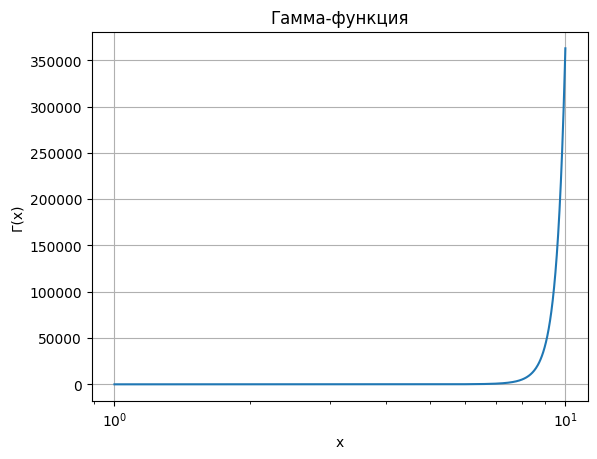

In [ ]:
x = np.logspace(0, 1, 1000, endpoint=True)
y = [scipy.special.gamma(i) for i in x]

plt.semilogx(x, y)
plt.title("Гамма-функция")
plt.xlabel("x")
plt.ylabel("Г(x)")
plt.grid(True)
plt.show()

---

Зададим диапазон измерений $(n = 3, 4, 5, 6)$

In [ ]:
range_of_dimensions = range(3, 7)

Сначала посчитаем величины объемов $n$-мерных единичных шаров, пользуясь формулой
$$
V_{n}={\frac {\pi ^{n/2}}{\displaystyle \Gamma \left({\frac{n}{2}}+1\right)}}\cdot r^n,
$$
где n - элемент `range_of_dimensions`

In [ ]:
def calc_exact_volume(n):
  return math.pi ** (n / 2) / scipy.special.gamma(n / 2 + 1)

exact_volumes = {n: calc_exact_volume(n) for n in range_of_dimensions}

print("Точное значения объема для")
print("\n".join([f"n = {n} - {volume}" for n, volume in exact_volumes.items()]))

Точное значения объема для
n = 3 - 4.188790204786391
n = 4 - 4.934802200544679
n = 5 - 5.263789013914324
n = 6 - 5.167712780049969


Теперь напишем функцию `calc_volume_with` для оценки точности вычисления объема шара
Она будет принимать в качестве аргумента функцию `fn`, которая на основе `n` и количества испытаний `points_count` сгенерирует массив из точек `points`

Далее мы найдем количество точек из этого массива, которые находятся внутри сферы (`points_inside_sphere`), это можно сделать с помощью формулы Евклидова расстояния, вычисляющейся по теореме Пифагора
$$
d(p,q)=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2+\dots+(p_n-q_n)^2} = \sqrt{\sum_{k=1}^n (p_k-q_k)^2}
$$
Так как мы будем считать, что центр шара расположен начале координат, то можно упростить формулу до
$$
\sqrt{\sum_{k=1}^n (p_k)^2}
$$

Функция `is_point_inside_sphere` будет считать это самое расстояние и сравнивать его с $1$, если оно меньше, либо равно $1$, то точка принадлежит шару

Далее можно посчитать объем шара `sphere_volume` с помощью формулы
$$
V = 2^n * a/b,
$$
где $a$ - это количество точек внутри шара (`points_inside_sphere`), а $b$ - общее количество точек (`total_points_count`).

Получается мы найдем $a/b$-ую часть от объема $n$-мерного куба, это и будет объемом гипершара

In [ ]:
is_point_inside_sphere = lambda point_coords: np.sqrt(np.sum(point_coords ** 2)) <= 1

def calc_volume_with(fn, n, points_count):
  points = fn(n, points_count)
  points_inside_sphere = np.sum(np.apply_along_axis(is_point_inside_sphere, 1, points))
  sphere_volume = 2**n * points_inside_sphere / points_count
  return sphere_volume

Теперь объявим массив с количествами точек для каждого испытания

In [73]:
trials = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

И функцию, которая будет произодить вычисления объема шара и сравнивать их со значениями из `exact_volumes`

In [74]:
def perform_calculations(fn):
  results = []
  for n in range_of_dimensions:
    r = {
      "n": n,
      "results": []
    }
    for points_count in trials:
      sphere_volume = calc_volume_with(fn, n, points_count)
      error = abs(sphere_volume - exact_volumes[n]) / exact_volumes[n]
      r['results'].append([points_count, sphere_volume, error])
    results.append(r)
  return results

А так же напишем функцию, которая будет выводить результаты в виде таблицы

In [76]:
def print_results(results):
  for dimension_results in results:
    print(f"Результаты для n = {dimension_results['n']}")
    df = pd.DataFrame(dimension_results['results'], columns=['Кол-во испытаний', 'Величина объема', 'Погрешность'])
    print(df.to_string(index=False))
    print()

Для начала посчитаем объемы шаров, пользуясь методом Монте-Карло, для этого нам нужно сгенерировать массив случайно расположенных точек

Объявим функцию: `random_points`

Она будет генерировать массив случайных координат $-1\le x_j \le 1$ $(j=1,2,\dots,n)$

In [77]:
def random_points(n, points_count):
    return np.random.uniform(-1, 1, (points_count, n))

Посмотрим на результаты

In [78]:
monte_carlo_results = perform_calculations(random_points)

print_results(monte_carlo_results)

Результаты для n = 3
 Кол-во испытаний  Величина объема  Погрешность
                1         8.000000     0.909859
               10         4.800000     0.145916
              100         4.480000     0.069521
             1000         4.480000     0.069521
            10000         4.145600     0.010311
           100000         4.185760     0.000723
          1000000         4.190864     0.000495
         10000000         4.188338     0.000108

Результаты для n = 4
 Кол-во испытаний  Величина объема  Погрешность
                1         0.000000     1.000000
               10         4.800000     0.027317
              100         4.640000     0.059739
             1000         4.800000     0.027317
            10000         4.985600     0.010294
           100000         4.929920     0.000989
          1000000         4.924672     0.002053
         10000000         4.932166     0.000534

Результаты для n = 5
 Кол-во испытаний  Величина объема  Погрешность
                1      

Так как шар симметричен относительно центра координат, то генерируя только положительные координаты ($0\le x_j \le 1$ $(j=1,2,\dots,n)$), мы можем производить в $2^n$ раз меньше испытаний, считая, что точки в остальных, симметричных относительно центра, координатах симметричны уже сгенерированным

Теперь будем генерировать точки не со случайными координатами, а с координатами, расположенными по равномерной сетке

In [80]:
def lin_points(n, trials):
  grid = np.linspace(-1, 1, int(trials**(1/n)) or 1)
  points = np.meshgrid(*([grid]*n))
  return np.array([point.flatten() for point in points]).T[:trials]

In [81]:
lin_points_results = perform_calculations(lin_points)

print_results(lin_points_results)

Результаты для n = 3
 Кол-во испытаний  Величина объема  Погрешность
                1         0.000000     1.000000
               10         0.000000     1.000000
              100         0.640000     0.847211
             1000         2.056000     0.509166
            10000         3.335200     0.203780
           100000         3.808000     0.090907
          1000000         3.940536     0.059266
         10000000         4.104567     0.020107

Результаты для n = 4
 Кол-во испытаний  Величина объема  Погрешность
                1         0.000000     1.000000
               10         0.000000     1.000000
              100         1.440000     0.708195
             1000         1.424000     0.711437
            10000         3.072000     0.377483
           100000         3.229600     0.345546
          1000000         4.008848     0.187638
         10000000         4.512000     0.085678

Результаты для n = 5
 Кол-во испытаний  Величина объема  Погрешность
                1      

Можно заметить, что погрешность получается намного больше, это потому, что в `lin_points` генерируются точки расположенные строго по сетке

Я нашел интересную [статью](https://habr.com/ru/articles/440892/) про эффективное распределение точек в пространстве, воспользуемся алгоритмом распределения координат оттуда

In [82]:
def phi(d): 
  x=2.0000 
  for i in range(10): 
    x = pow(1+x,1/(d+1)) 
  return x

def lin_points2(n, trials):
  g = phi(n) 
  alpha = np.zeros(n) 
  for j in range(n): 
    alpha[j] = pow(1/g,j+1) % 1 
  points = np.zeros((trials, n)) 

  for i in range(trials): 
    points[i] = (0.5 + alpha*(i+1)) % 1

  return points

In [83]:
lin_points2_results = perform_calculations(lin_points2)

print_results(lin_points2_results)

Результаты для n = 3
 Кол-во испытаний  Величина объема  Погрешность
                1         8.000000     0.909859
               10         1.600000     0.618028
              100         3.760000     0.102366
             1000         4.160000     0.006873
            10000         4.199200     0.002485
           100000         4.194800     0.001435
          1000000         4.188624     0.000040
         10000000         4.188841     0.000012

Результаты для n = 4
 Кол-во испытаний  Величина объема  Погрешность
                1        16.000000     2.242278
               10         4.800000     0.027317
              100         4.480000     0.092162
             1000         4.800000     0.027317
            10000         4.948800     0.002837
           100000         4.935680     0.000178
          1000000         4.933120     0.000341
         10000000         4.934776     0.000005

Результаты для n = 5
 Кол-во испытаний  Величина объема  Погрешность
                1      

Соберем все полученные результаты в один массив для более удобного сравнения, а так же добавим туда цвета и названия способов вычисления

In [84]:
results = [
  (monte_carlo_results, (1, 0, 0), 'random_points'),
  (lin_points_results, (0, 1, 0), 'lin_points'),
  (lin_points2_results, (0, 0, 1), 'lin_points2')
]

Теперь сравним погрешности каждой из функций по отдельности для разных n

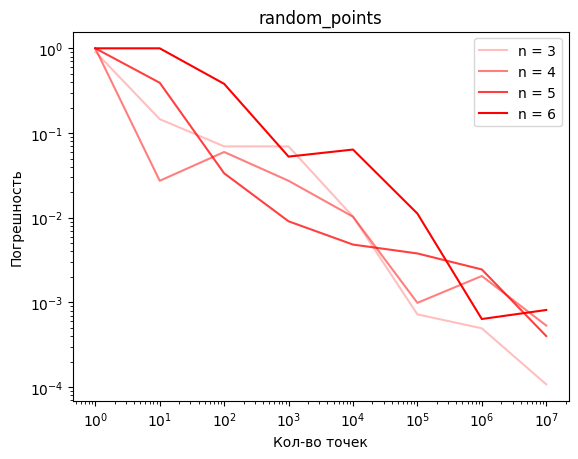

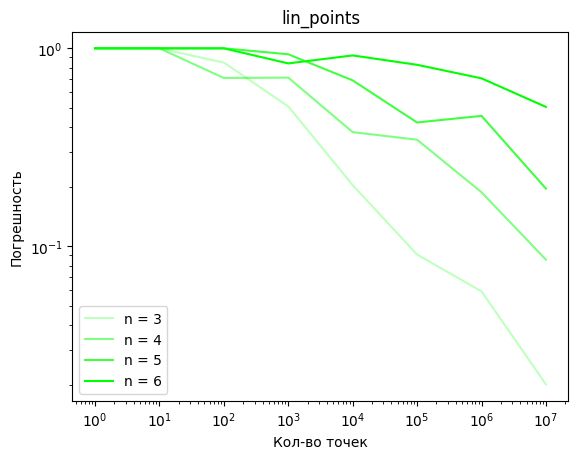

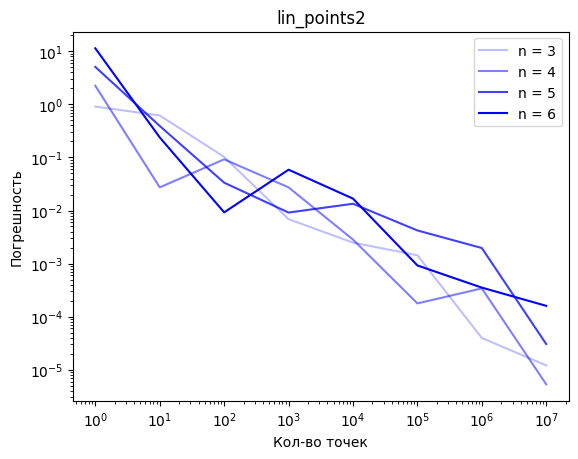

In [85]:
for (res, color, label) in results:
  plt.figure()

  for (i, r) in enumerate(res):
    x = np.array(list(map(lambda a: a[0], r['results'])))
    y = np.array(list(map(lambda a: a[2], r['results'])))
    plt.loglog(x, y, color=(color[0], color[1], color[2], (i+1)/len(res)), label=f"n = {r['n']}")

  plt.title(label)
  plt.xlabel('Кол-во точек')
  plt.ylabel('Погрешность')
  plt.legend()
  plt.show()

Теперь сравним `results`, усреднив результаты для разных $n$ от одной функции

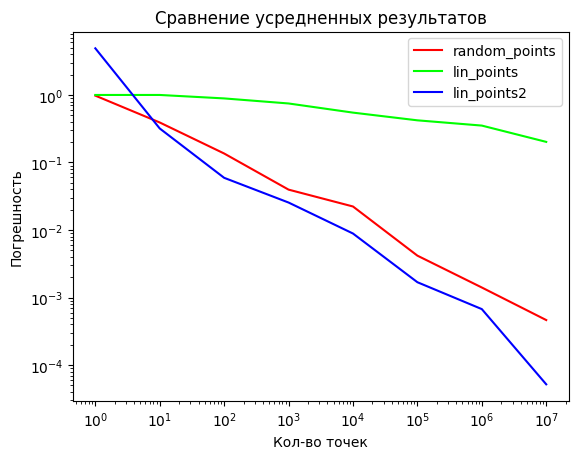

In [86]:
avg_results = []

for res in results:
  to_avg = [[] for _ in range(len(res[0][0]['results']))]
  for dim in res[0]:
    for (i, r) in enumerate(dim['results']):
      to_avg[i].append(r[2])

  avg_results.append((list(map(np.average, to_avg)), res[1], res[2]))

plt.figure()

for (res, color, label) in avg_results:
  x = np.array(list(map(lambda a: a[0], results[0][0][0]['results'])))
  y = np.array(res)
  plt.loglog(x, y, color=color, label=label)

plt.title('Сравнение усредненных результатов')
plt.xlabel('Кол-во точек')
plt.ylabel('Погрешность')
plt.legend()
plt.show()

## Вывод
Простое равномерное распределение точек с `lin_points` дает самое большое расхождение с теоретическими результатами, метод Монте-Карло (генерация рандомных координат `random_points`) и генерация эффективно распределенных координат `lin_points2` дают почти одинаковые результаты, но `lin_points2` выдает чуть меньшую погрешность